<a href="https://colab.research.google.com/github/Krishvashistha/ML-project-/blob/main/mlspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/content/spam.csv')
df.shape
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_2.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
# Convert 'ham' to 0 and 'spam' to 1
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

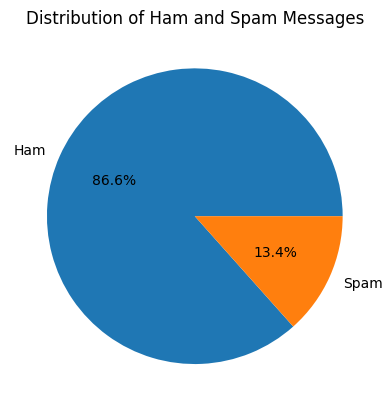

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%')

# Set the title and display the plot
plt.title('Distribution of Ham and Spam Messages')
plt.show()

In [ ]:
import nltk  # Import the NLTK library

def count_words_sentences(text):
  """Counts the number of words and sentences in a given text.

  Args:
    text: The text to analyze.

  Returns:
    A tuple containing the number of words and sentences.
  """

  # Tokenize the text into words
  words = nltk.word_tokenize(text)

  # Tokenize the text into sentences
  sentences = nltk.sent_tokenize(text)

  # Return the number of words and sentences
  return len(words), len(sentences)

# Apply the function to the 'Message' column of the DataFrame
word_counts, sentence_counts = zip(*df['Message'].apply(count_words_sentences))

# Create new columns in the DataFrame to store the counts
df['Word_Count'] = word_counts
df['Sentence_Count'] = sentence_counts

In [ ]:
# Calculate the number of characters in each message
df['Character_Count'] = df['Message'].apply(lambda x: len(x))

In [ ]:
df.head()

,Category,Message,Word_Count,Sentence_Count,Character_Count
0,ham,go jurong point crazi avail bugi n great world...,16,1,76
1,ham,ok lar joke wif u oni,6,1,21
2,spam,free entri 2 wkli comp win fa cup final tkt 21...,23,1,131
3,ham,u dun say earli hor u c alreadi say,9,1,35
4,ham,nah dont think goe usf live around though,8,1,41


In [ ]:
df.describe()

,Word_Count,Sentence_Count
count,5572.000000,5572.000000
mean,18.826992,2.004666
std,13.853616,1.539516
min,1.000000,1.000000
25%,9.000000,1.000000
50%,15.000000,2.000000
75%,27.000000,2.000000
max,220.000000,38.000000


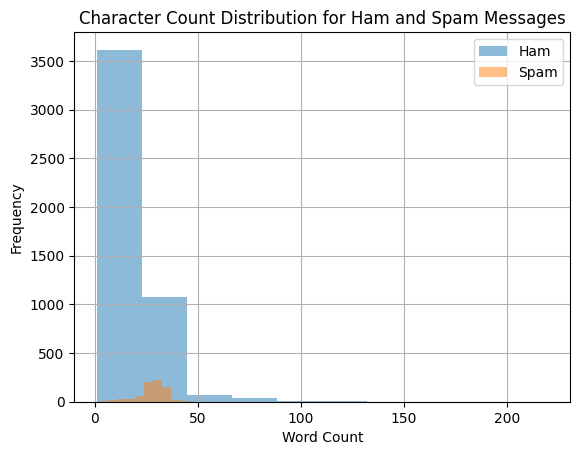

<Figure size 100000x100000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram plot for character count for ham and spam separately
df.groupby('Category')['Word_Count'].hist(alpha=0.5)

# Set the title and labels
plt.title('Character Count Distribution for Ham and Spam Messages')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Add a legend
plt.legend(['Ham', 'Spam'])
plt.figure(figsize=(1000,1000))
# Show the plot
plt.show()

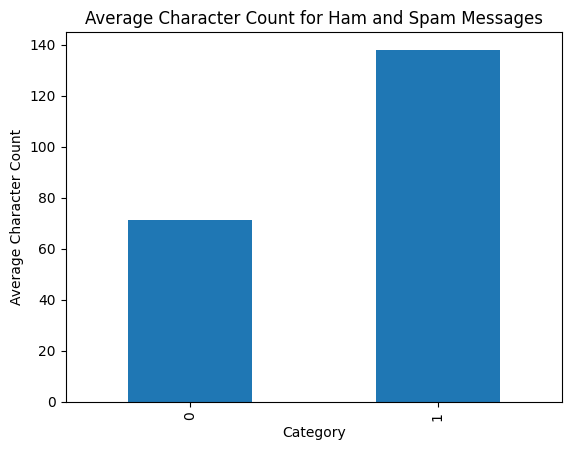

In [ ]:
import matplotlib.pyplot as plt

# Create a bar graph for character count for ham and spam separately
df. groupby('Category')['Character_Count'].mean().plot(kind='bar')

# Set the title and labels
plt.title('Average Character Count for Ham and Spam Messages')
plt.xlabel('Category')
plt.ylabel('Average Character Count')

# Show the plot
plt.show()

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stem the tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text
preprocess_text("my nMae is krish vaShistha")

'nmae krish vashistha'

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/spam.csv')

# Preprocess the text in the 'Message' column
df['Message'] = df['Message'].apply(preprocess_text)

# Print the updated DataFrame
print(df)

     Category                                            Message
0         ham  go jurong point crazi avail bugi n great world...
1         ham                              ok lar joke wif u oni
2        spam  free entri 2 wkli comp win fa cup final tkt 21...
3         ham                u dun say earli hor u c alreadi say
4         ham          nah dont think goe usf live around though
...       ...                                                ...
5567     spam  2nd time tri 2 contact u u 750 pound prize 2 c...
5568      ham                            ü b go esplanad fr home
5569      ham                            piti mood soani suggest
5570      ham  guy bitch act like id interest buy someth els ...
5571      ham                                     rofl true name

[5572 rows x 2 columns]


In [ ]:
df.head()

,Category,Message,Word_Count,Sentence_Count,Character_Count
0,0,go jurong point crazi avail bugi n great world...,16,1,76
1,0,ok lar joke wif u oni,6,1,21
2,1,free entri 2 wkli comp win fa cup final tkt 21...,23,1,131
3,0,u dun say earli hor u c alreadi say,9,1,35
4,0,nah dont think goe usf live around though,8,1,41


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

# Vectorize the messages
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message'])

# Vectorize the categories
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(df['Category'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score

# Create a MultinomialNB model
model = MultinomialNB()

# Train the model
model.fit(X, y)

# Evaluate the model
score = model.score(X_test, Y_test)
print('Accuracy:', score)


Accuracy: 0.9874439461883409


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, model.predict(X_test))

# Calculate precision
precision = precision_score(Y_test, model.predict(X_test))

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)

Accuracy: 0.9874439461883409
Precision: 0.9675324675324676
